In [1]:
import pandas as pd

data = pd.read_csv('bipolar_disorder.csv')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np


# Data preprocessing for clustering
# Selecting only the ordinal scale questions for clustering
ordinal_columns = [col for col in data.columns if sorted(data[col].unique()) == [1, 2, 3, 4, 5]]

clustering_data = data[ordinal_columns]

# Standardizing the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Applying K-Means clustering
# Choosing an arbitrary number of clusters for initial analysis, this can be refined later
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(clustering_data_scaled)

# Adding cluster labels to the dataset
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = clusters

# Analyzing the clusters
cluster_summary = data_with_clusters.groupby('Cluster')[ordinal_columns].mean()

cluster_summary

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Have you experienced periods of irritable mood that lasted at least a week or periods of persistent sadness, hopelessness, or loss of interest (depression)?  \
Cluster                                                                                                                                                                 
0                                                 2.220339                                                                                                              
1                                                 3.914894                                                                                                              
2                                                 3.312500                                                                                                              

         Have you experienced changes in appetite or weight during mood episodes?  \
Cluster                                                                             
0                                                 2.203390                          
1                                                 3.574468                          
2                                                 3.187500                          

         Have you experienced difficulties at work or school related to your mood swings?  \
Cluster                                                                                     
0                                                 2.423729                                  
1                                                 4.170213                                  
2                                                 4.062500                                  

         Have you experienced recurrent thoughts of suicide during depressive phase?  \
Cluster                                                                                
0                                                 1.576271                             
1                                                 3.021277                             
2                                                 2.166667                             

         Have your relationships with family, friends, or colleagues been affected by your mood swings?  \
Cluster                                                                                                   
0                                                 2.423729                                                
1                                                 4.106383                                                
2                                                 3.645833                                                

         How would you rate your ability to concentrate and maintain focus during extreme depression state?  \
Cluster                                                                                                       
0                                                 2.932203                                                    
1                                                 4.063830                                                    
2                                                 3.541667                                                    

         Do you tend to withdraw from social activities during extreme depression state?  \
Cluster                                                                                    
0                                                 2.711864                                 
1                                                 4.042553                                 
2                                                 3.645833                                 

         How comfortable are you with the idea of starting therapy for bipolar disorder?  \
Cluster                                                                                    
0                                                 3.169492                                 
1

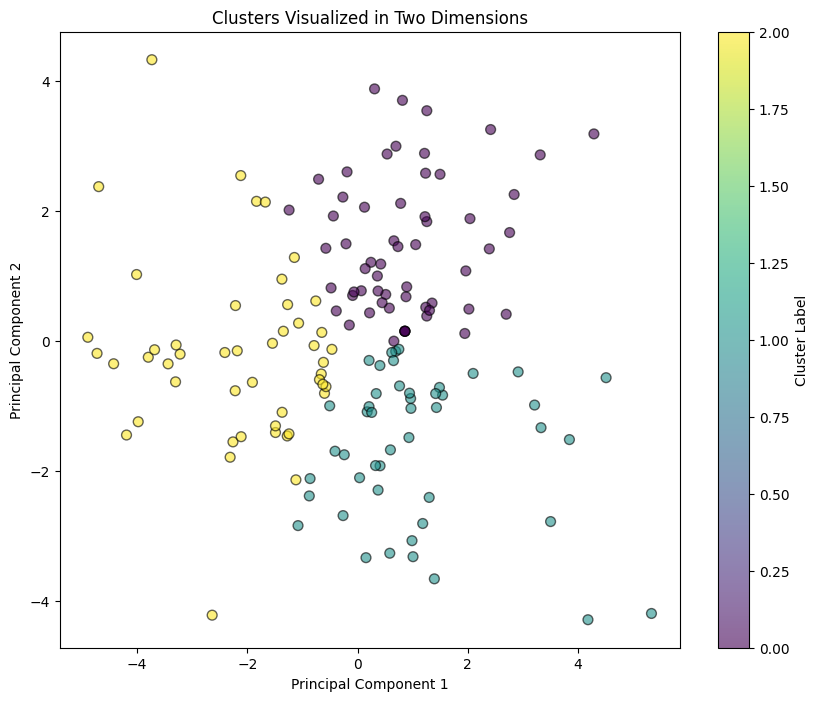

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Applying PCA to reduce to two dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(clustering_data_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
plt.title('Clusters Visualized in Two Dimensions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

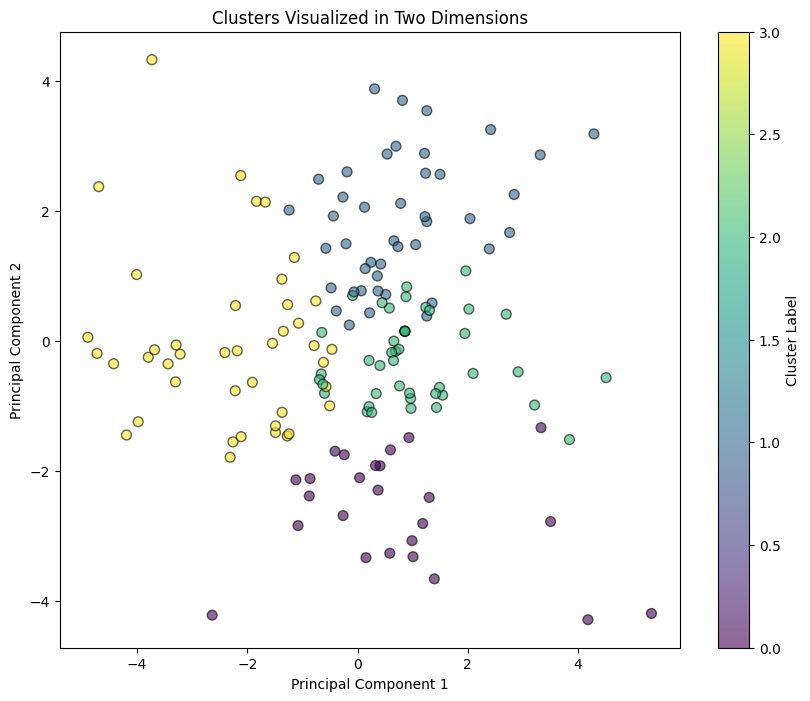

In [ ]:
from sklearn.decomposition import PCA

# Applying PCA to reduce to two dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(clustering_data_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
plt.title('Clusters Visualized in Two Dimensions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [ ]:
# Correcting the column names to match the provided list
corrected_categorical_columns = [
    'Age ', 'Gender',
    'Are you currently undergoing from diagnosis for bipolar disorder?',
    'During extreme emotions, do you find yourself with increased energy, feeling restless, or engaging in impulsive activities?',
    'Have you noticed significant changes in your sleep patterns during extreme emotional state?',
    'Do you experience rapid speech or racing thoughts during depression?',
    'Are you undergoing any kind of therapy for bipolar disorder?',
    'If not, what kind of medium or self-help acts like a therapy for you?',
    'How frequently would you prefer therapy sessions for managing bipolar disorder or for anybody suffering from it?',
    'How do you prefer to receive therapy information and resources?'
]

# Redoing the distribution analysis for categorical data with corrected column names
categorical_distributions_corrected = {col: data[col].value_counts() for col in corrected_categorical_columns}

# Recheck missing values and summary statistics
missing_values_corrected = data.isnull().sum()
summary_statistics_corrected = data[ordinal_columns].describe()

missing_values_corrected, summary_statistics_corrected, categorical_distributions_corrected

(Age                                                                                                                                                             0
 Gender                                                                                                                                                          0
 Are you currently undergoing from diagnosis for bipolar disorder?                                                                                               0
 Have you experienced periods of irritable mood that lasted at least a week or periods of persistent sadness, hopelessness, or loss of interest (depression)?    0
 During extreme emotions, do you find yourself with increased energy, feeling restless, or engaging in impulsive activities?                                     0
 Have you noticed significant changes in your sleep patterns during extreme emotional state?                                                                     0
 Have you experienced 

**we have to edit this for our own data **

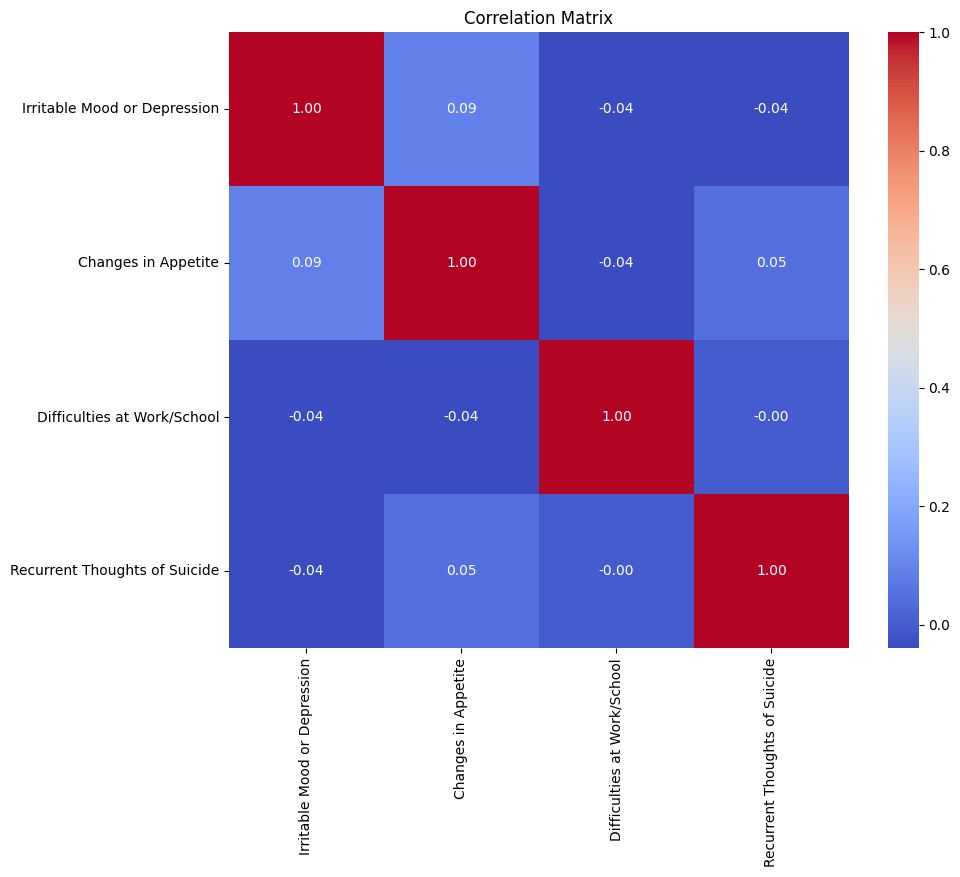

In [ ]:
# Since the dataset and the specific ordinal columns are not currently loaded due to the reset state,
# I will create a sample dataset to demonstrate how you would do this with your actual data.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data creation (Replace this with actual data loading and your specific ordinal columns)
data_sample = pd.DataFrame({
    'Irritable Mood or Depression': np.random.randint(1, 6, 100),
    'Changes in Appetite': np.random.randint(1, 6, 100),
    'Difficulties at Work/School': np.random.randint(1, 6, 100),
    'Recurrent Thoughts of Suicide': np.random.randint(1, 6, 100),
    # Add more columns as in your actual dataset
})

# Calculating the correlation matrix
correlation_matrix = data_sample.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

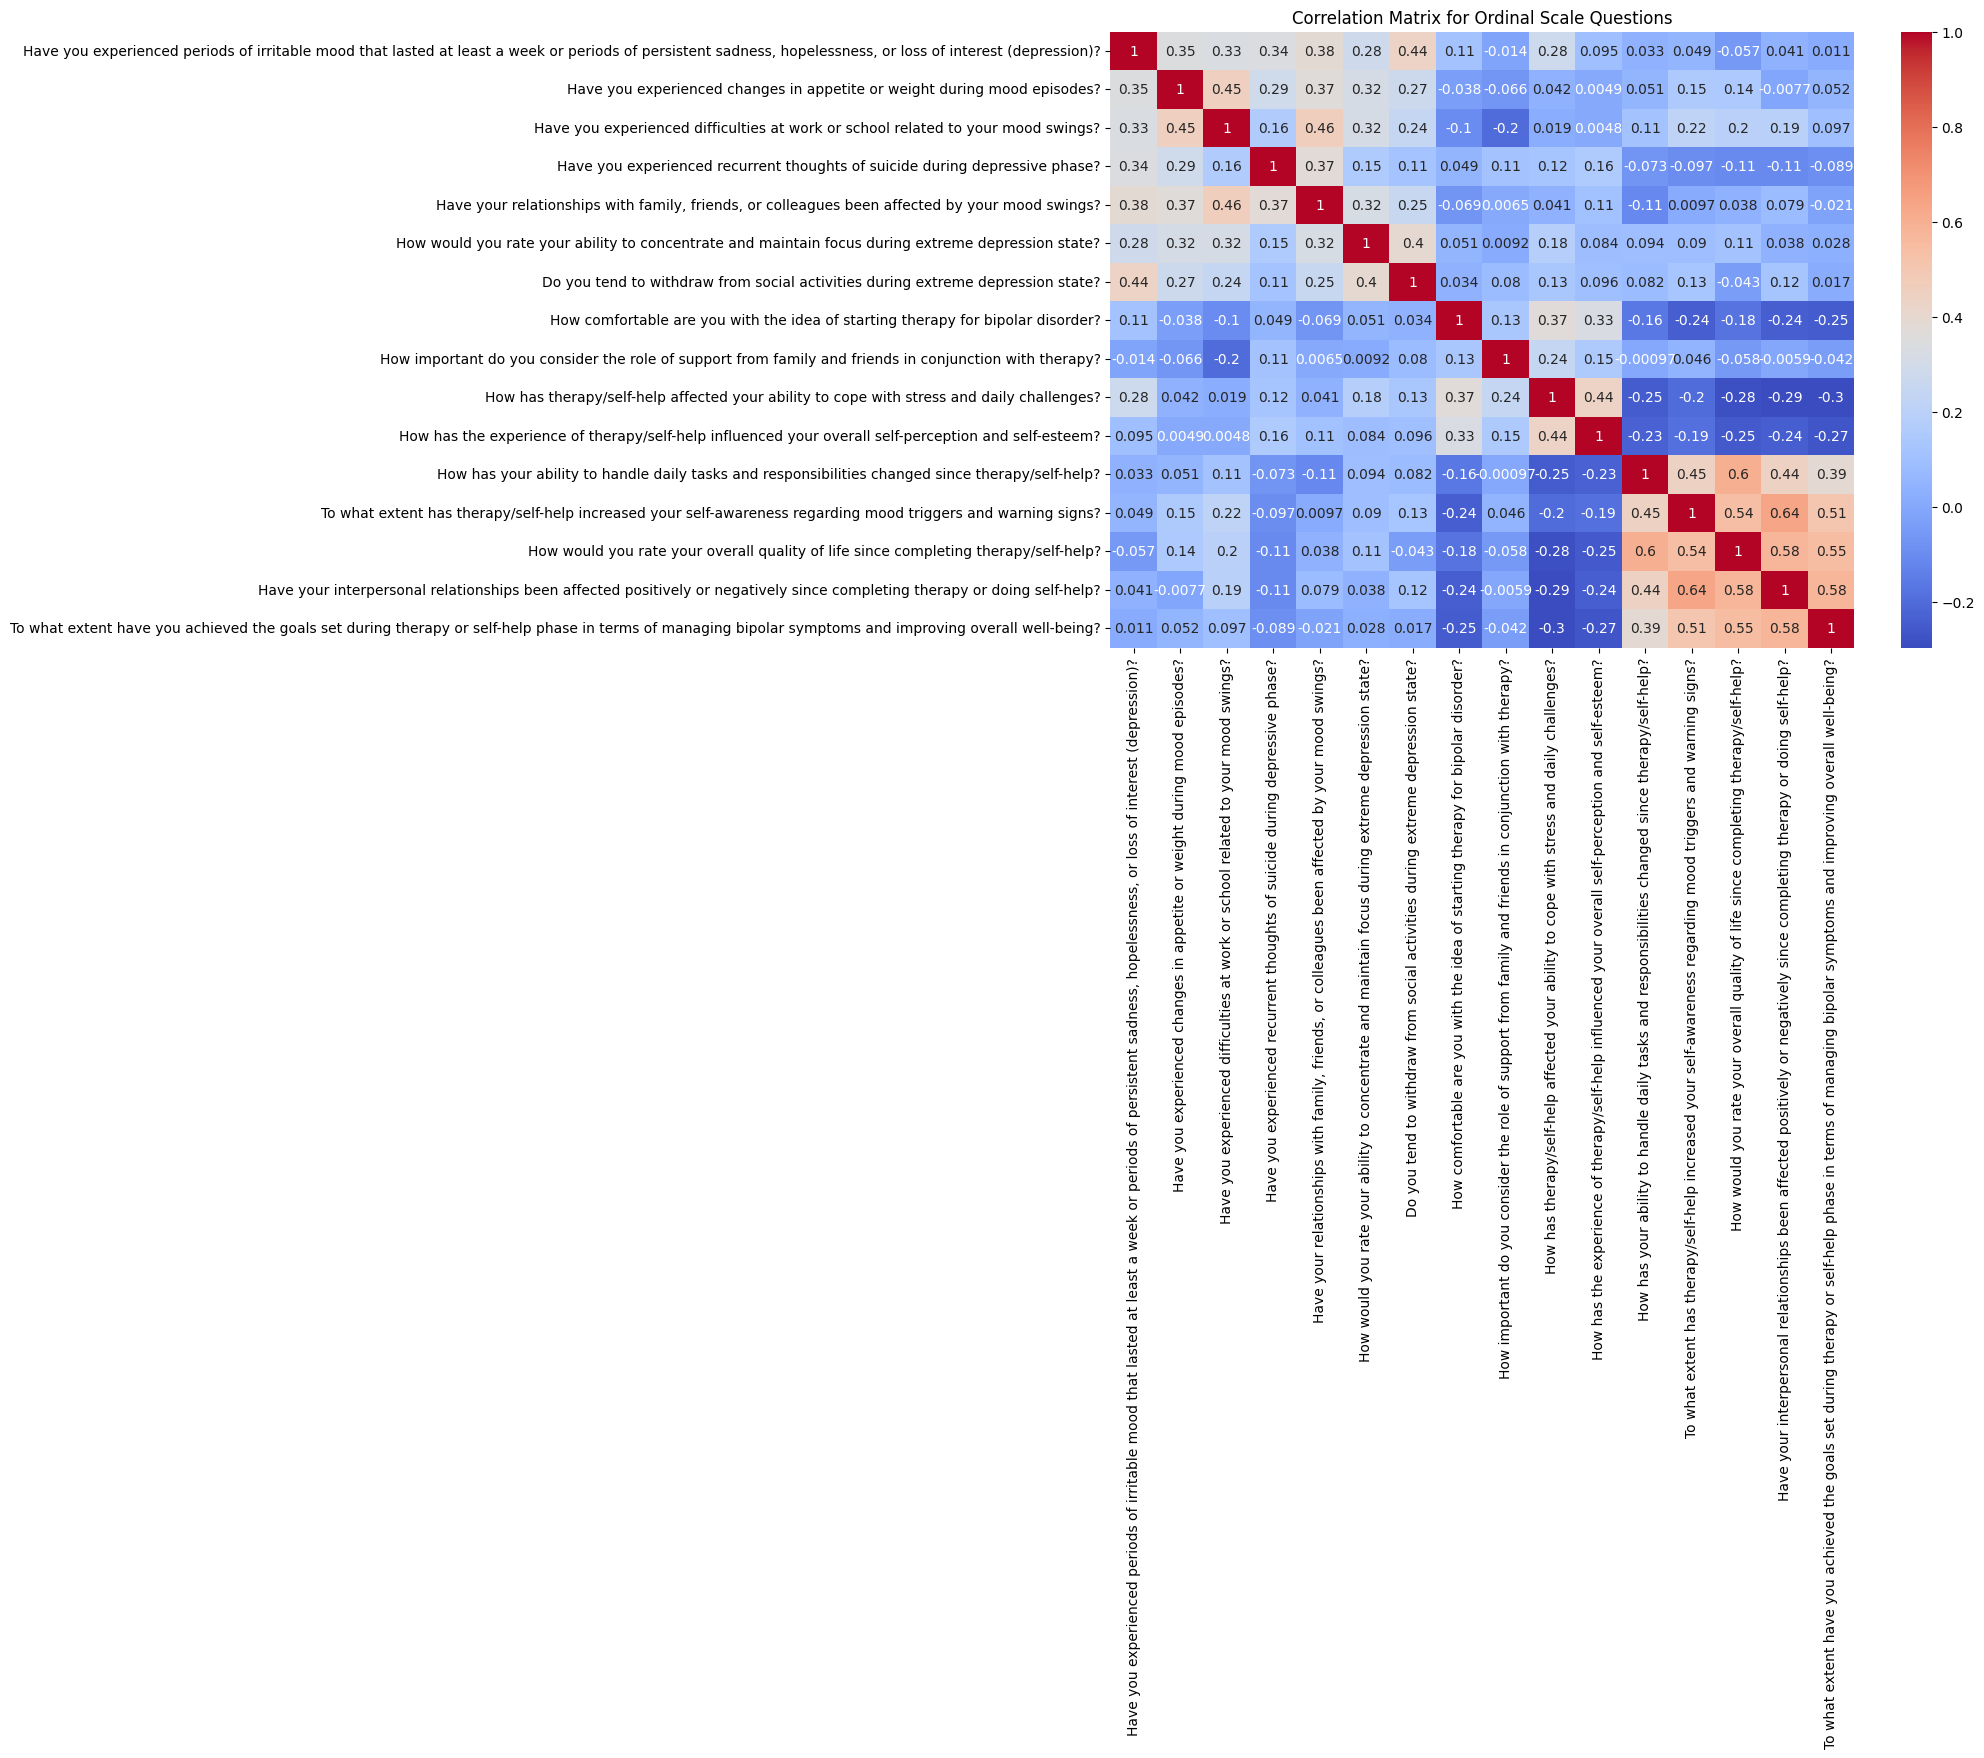

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Correlation analysis for ordinal scale questions
correlation_matrix = data[ordinal_columns].corr()

# Chi-square tests for categorical data
chi_square_results = {}
for col in corrected_categorical_columns:
    for col2 in corrected_categorical_columns:
        if col != col2:
            cross_tab = pd.crosstab(data[col], data[col2])
            chi2, p, dof, ex = chi2_contingency(cross_tab)
            chi_square_results[(col, col2)] = p

# Displaying the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Ordinal Scale Questions")
plt.show()

# Displaying a subset of chi-square test results
# (As there are many combinations, only a subset is shown for brevity)
#list(chi_square_results.items())[:10]  # Displaying first 10 results

Descriptive Statistics for Ordinal Data:
       Have you experienced periods of irritable mood that lasted at least a week or periods of persistent sadness, hopelessness, or loss of interest (depression)?  \
count                                         154.000000                                                                                                              
mean                                            3.077922                                                                                                              
std                                             1.335941                                                                                                              
min                                             1.000000                                                                                                              
25%                                             2.000000                                                                    

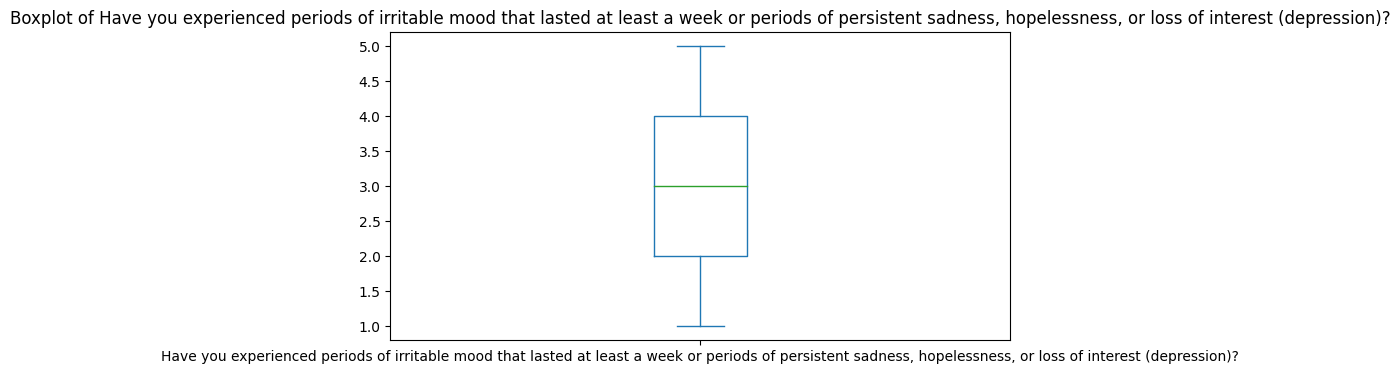

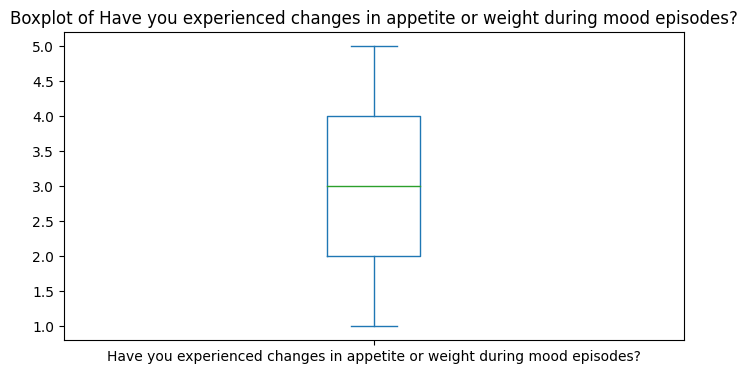

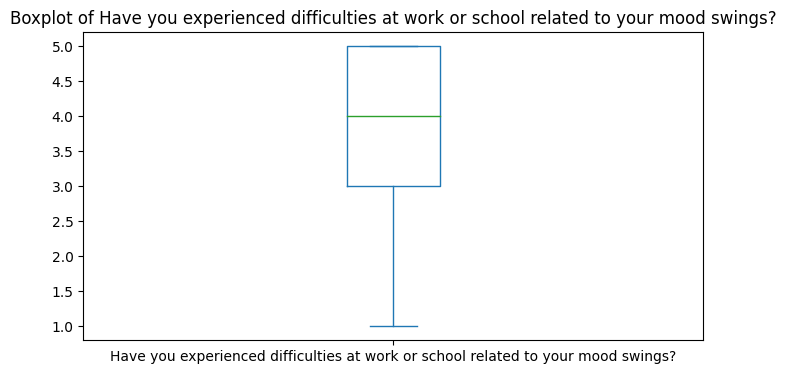

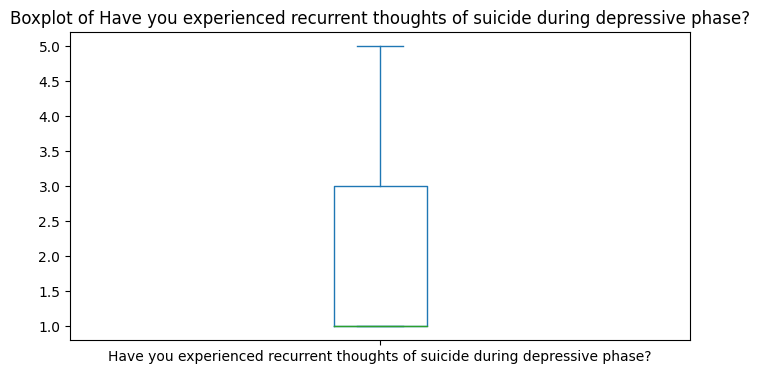

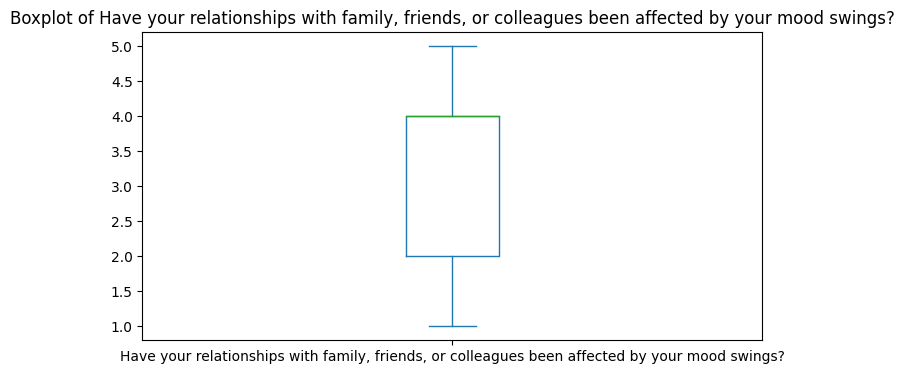

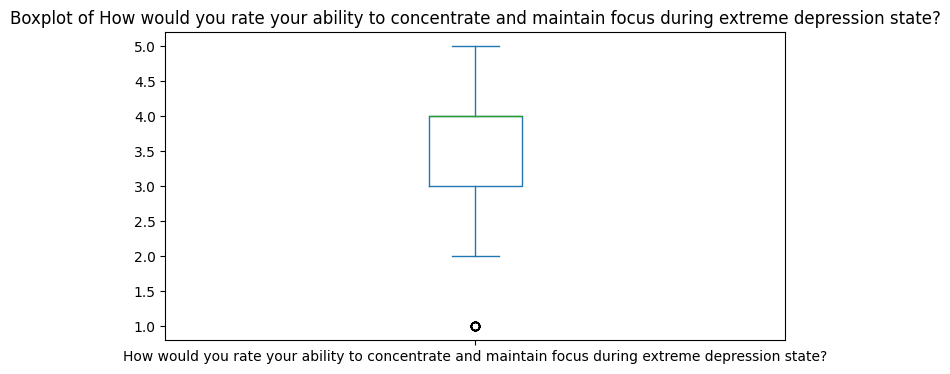

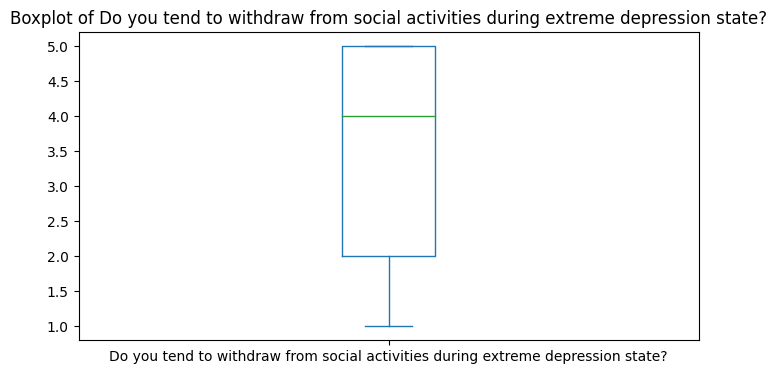

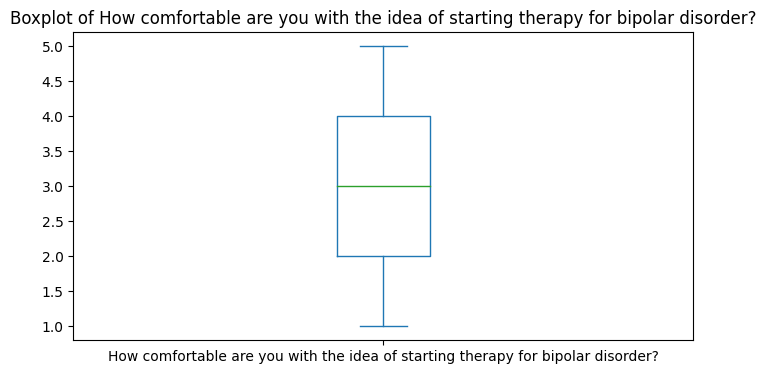

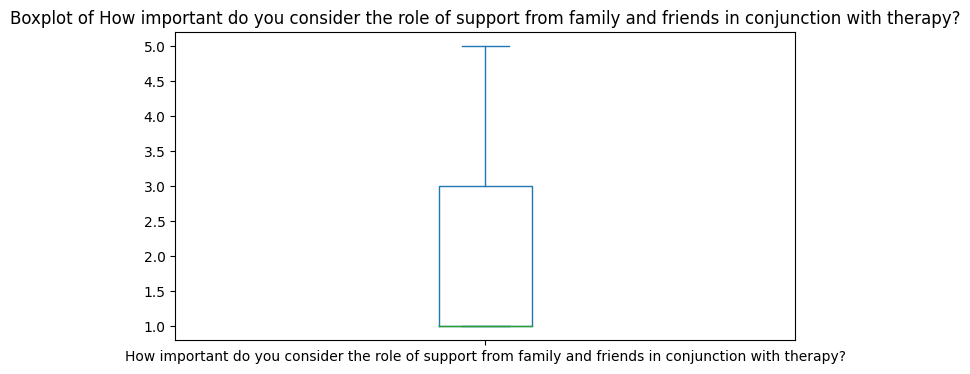

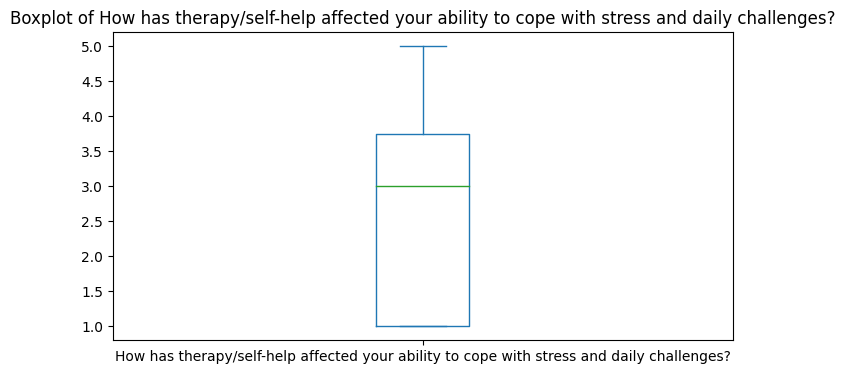

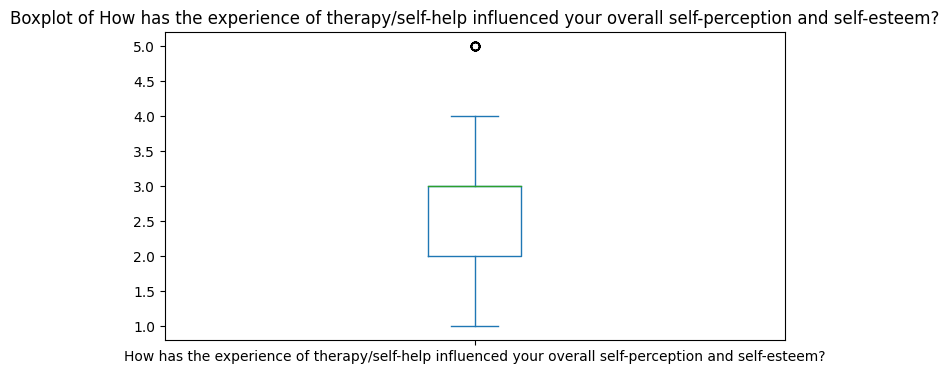

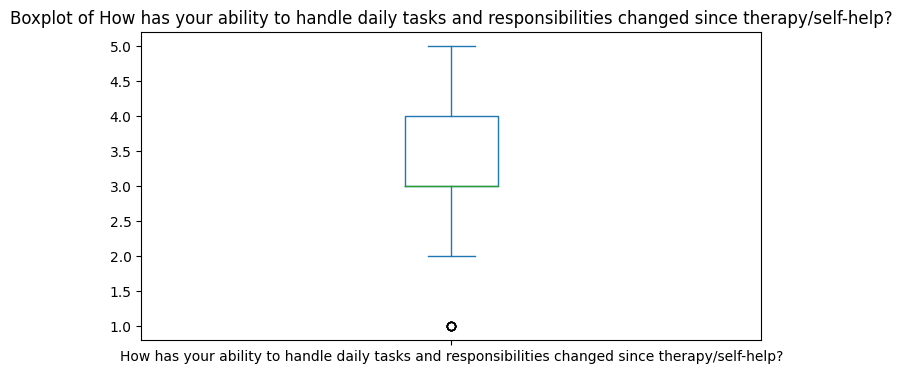

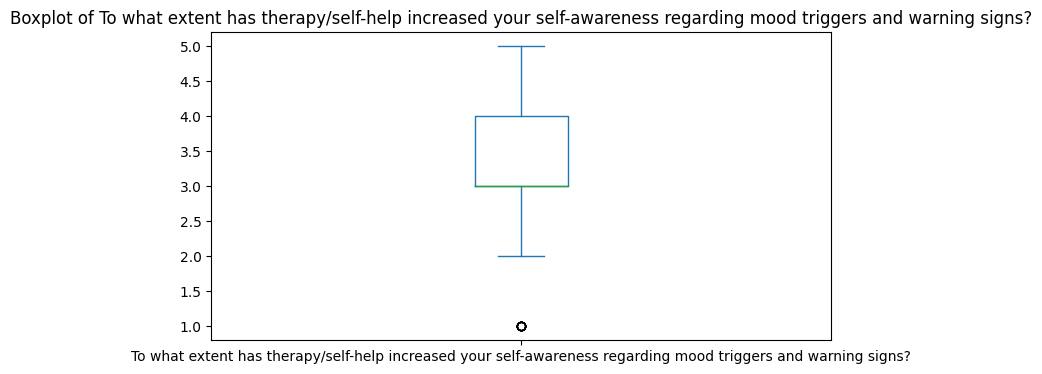

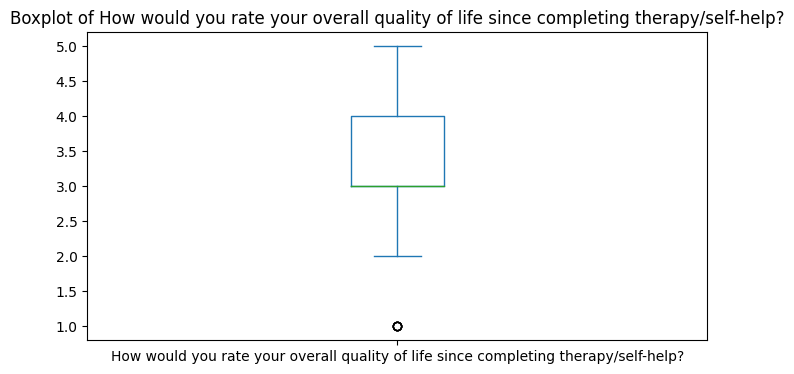

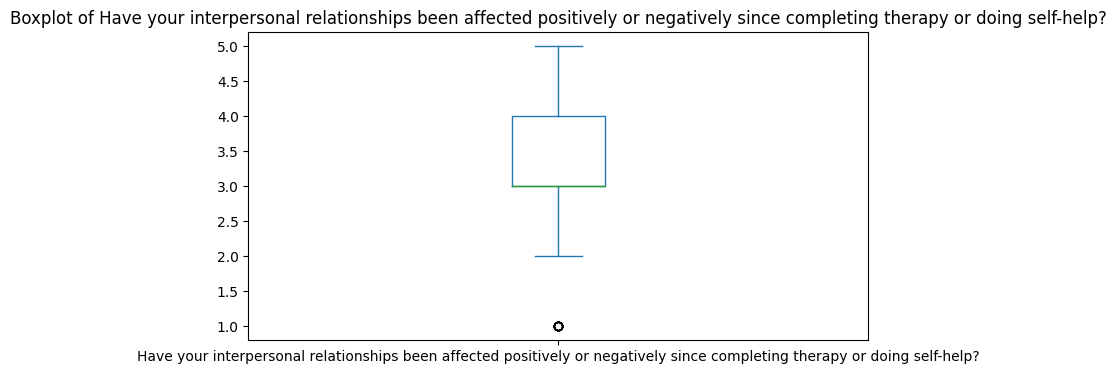

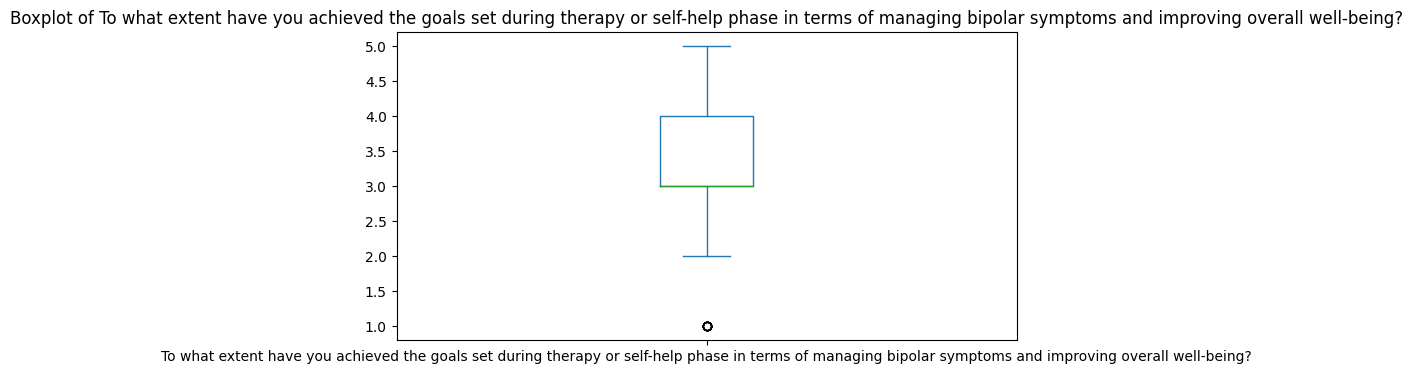

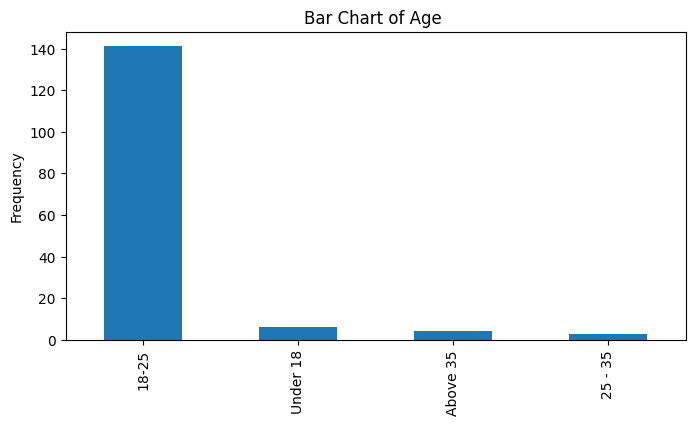

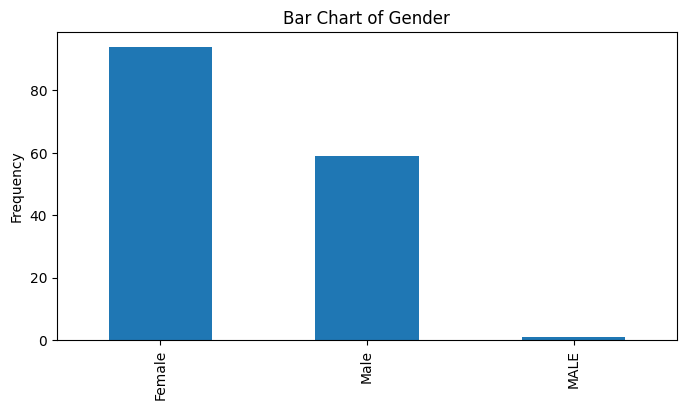

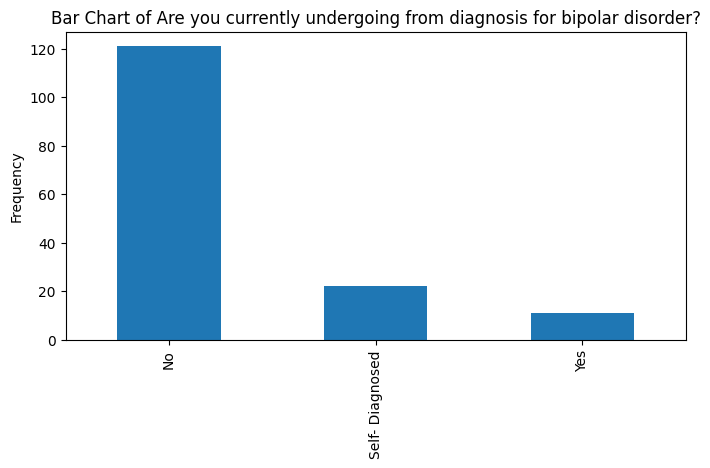

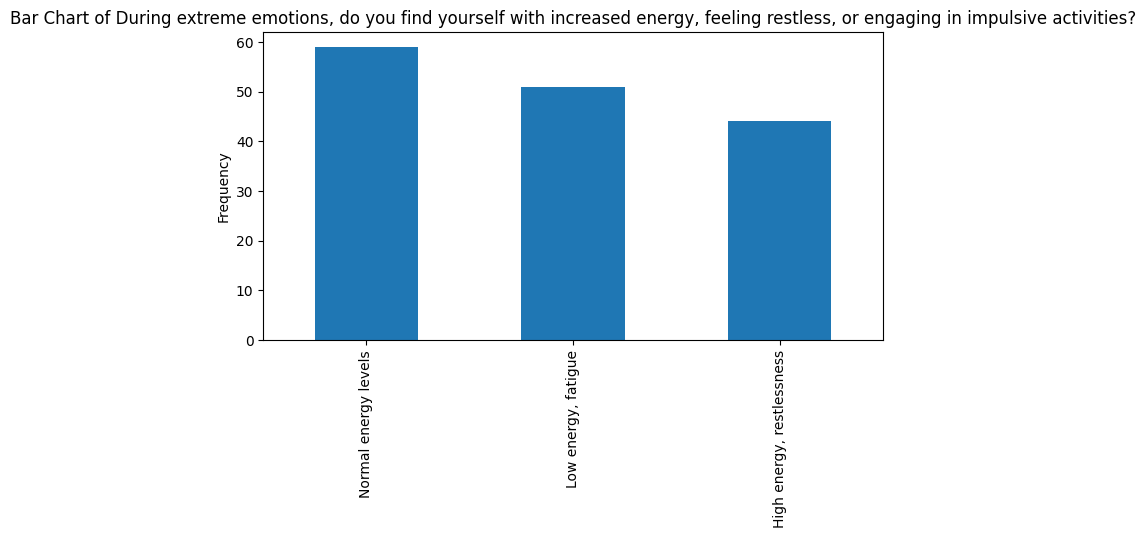

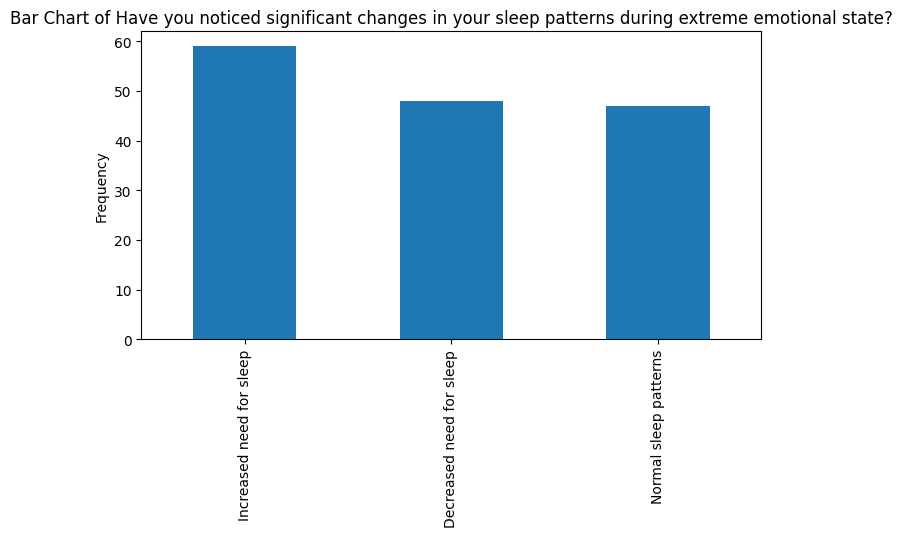

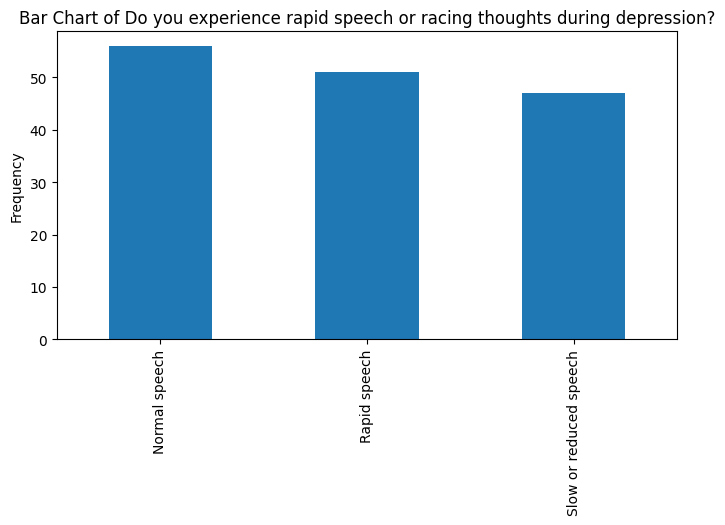

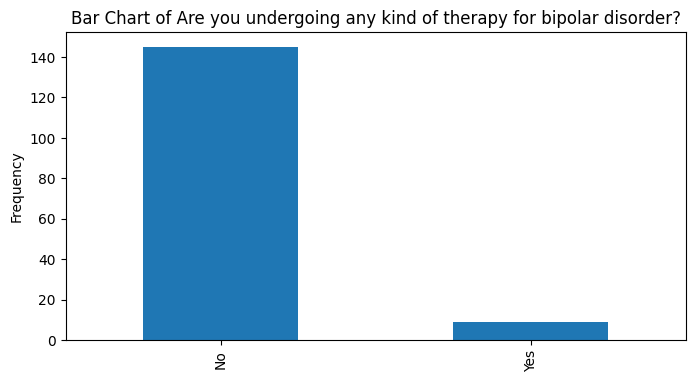

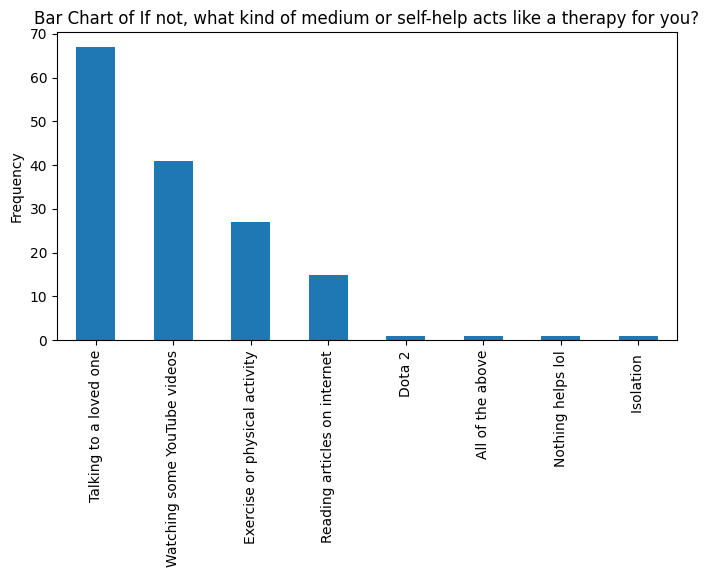

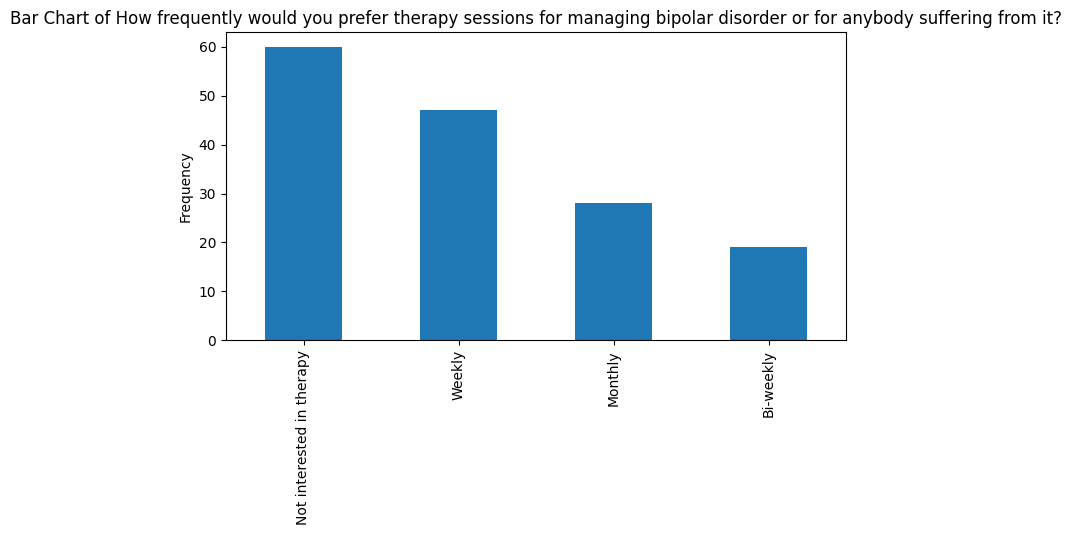

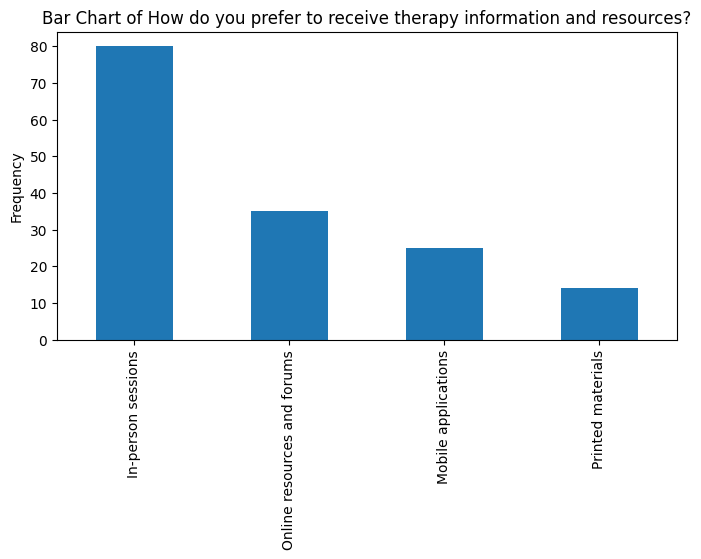

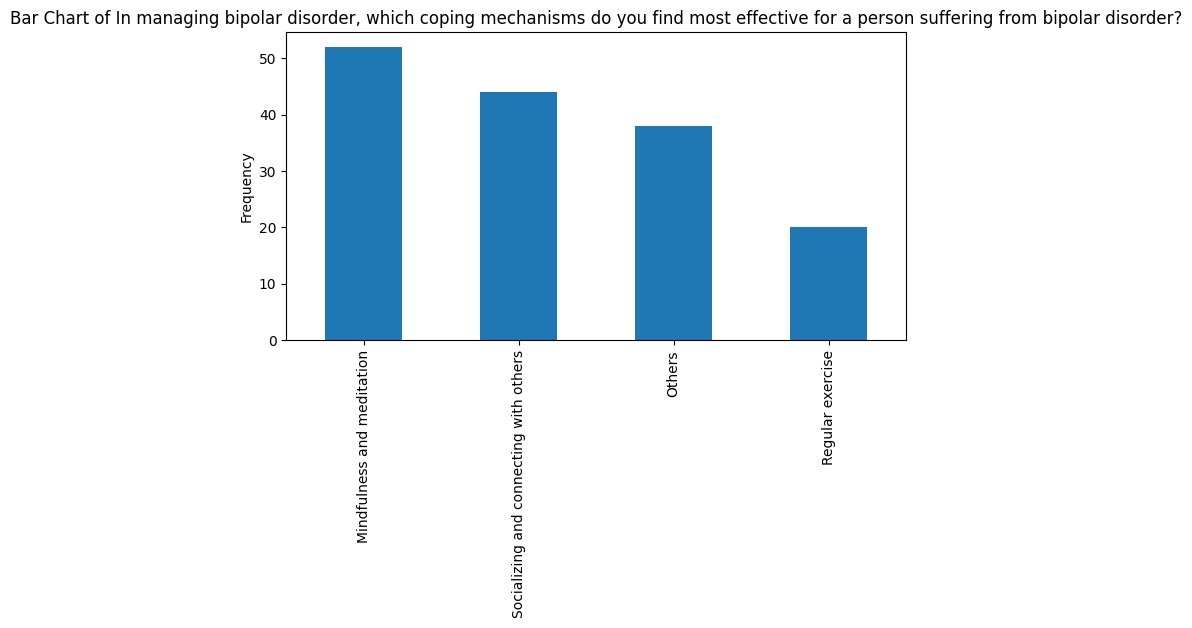

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/bipolardisfinal.csv')

# ------------------------------
# 1. Descriptive Statistics
# ------------------------------

# For ordinal data
# Replace with actual ordinal column names
ordinal_columns = [col for col in data.columns if sorted(data[col].unique()) == [1, 2, 3, 4, 5]]
print("Descriptive Statistics for Ordinal Data:")
print(data[ordinal_columns].describe())

# For categorical data
# Replace with actual categorical column names
#categorical_columns = data.select_dtypes(include=['category']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nDescriptive Statistics for Categorical Data:")
print(data[categorical_columns].apply(pd.Series.value_counts))
# Visualizing Ordinal Data
for col in ordinal_columns:
    plt.figure(figsize=(8, 4))
    data[col].plot(kind='box')
    plt.title(f'Boxplot of {col}')
    plt.show()

# Visualizing Categorical Data
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart of {col}')
    plt.ylabel('Frequency')
    plt.show()

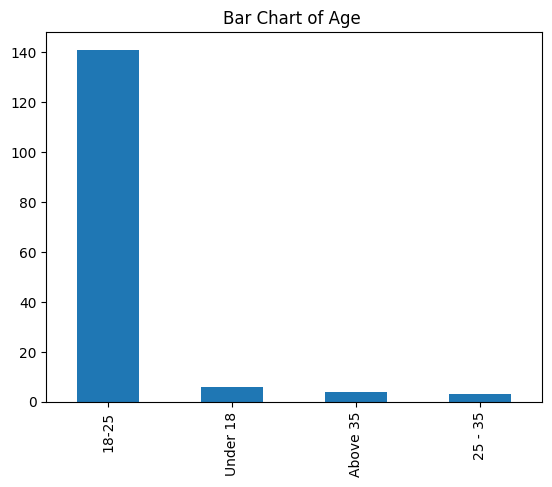

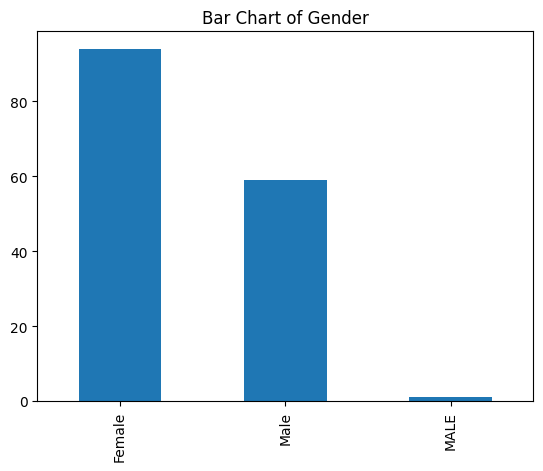

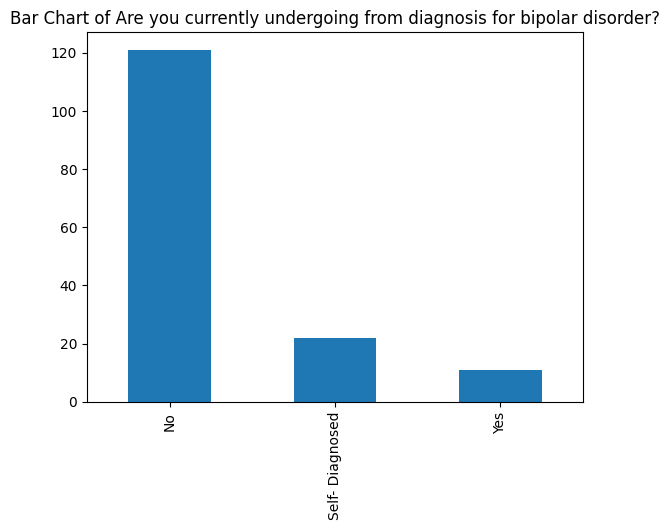

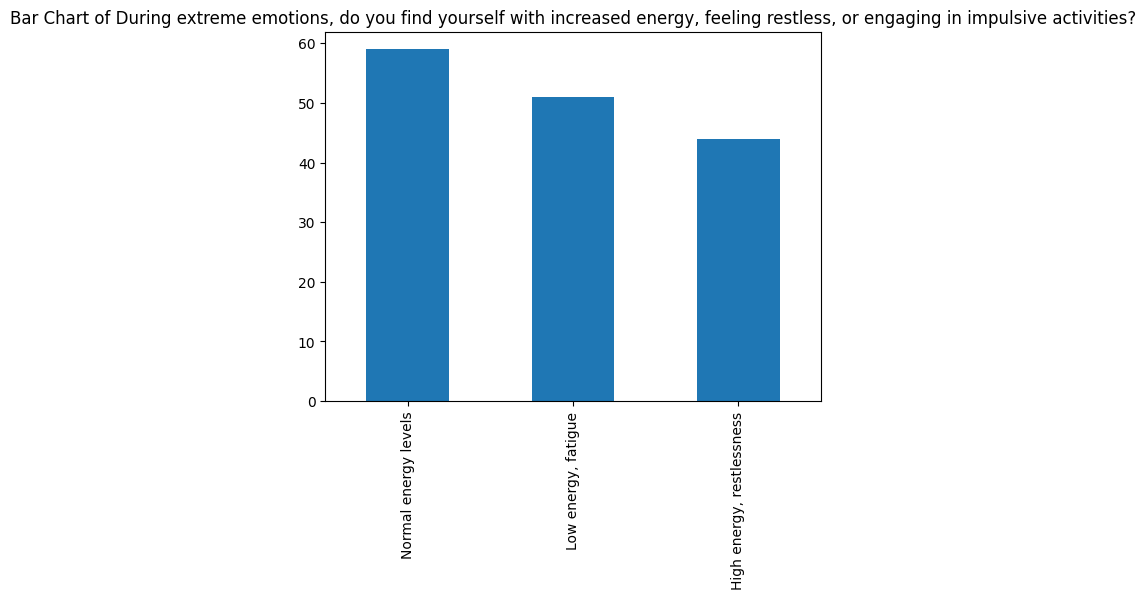

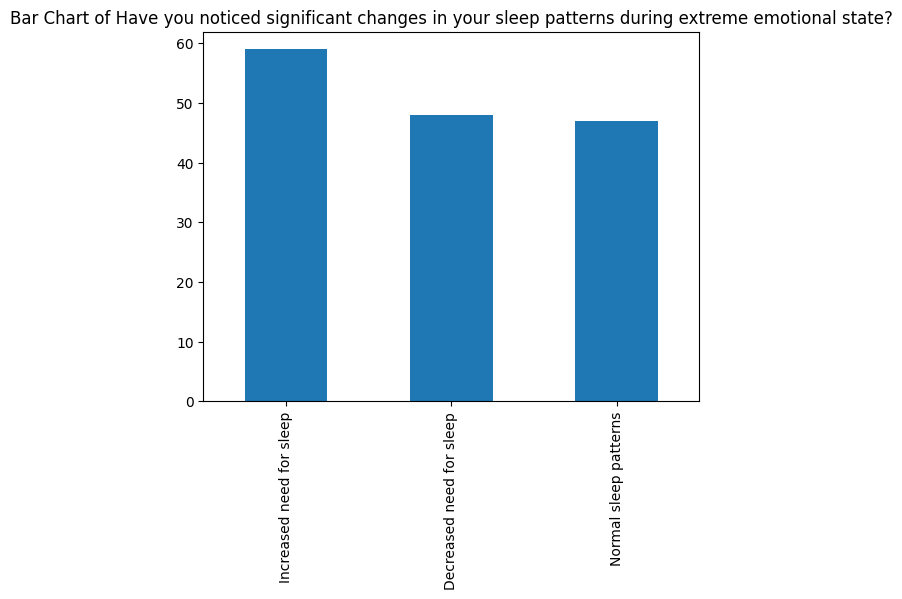

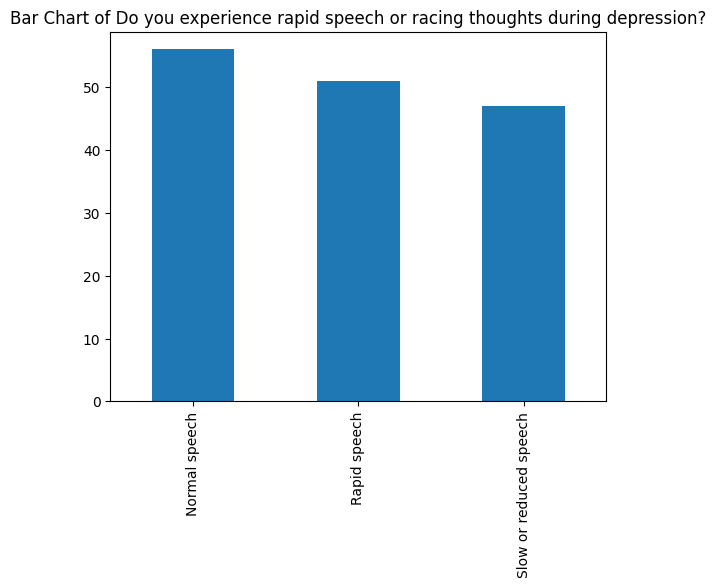

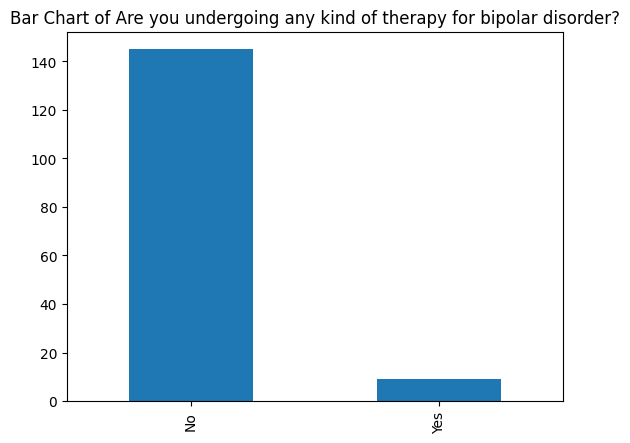

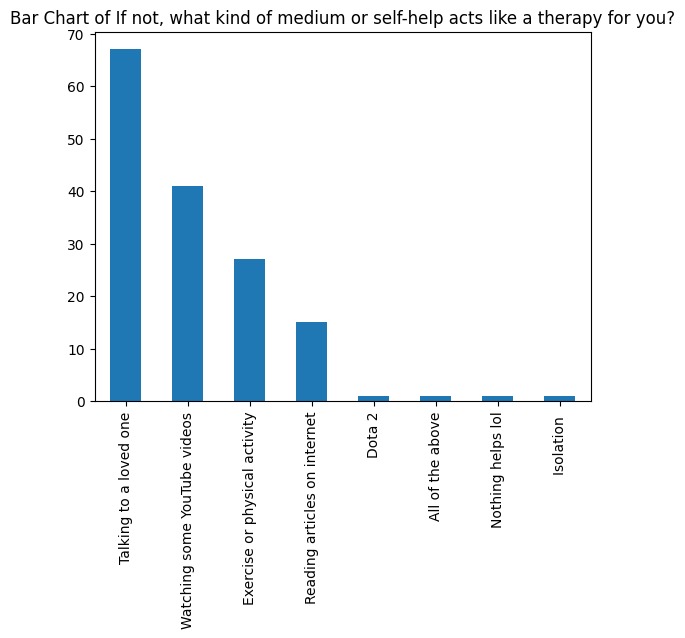

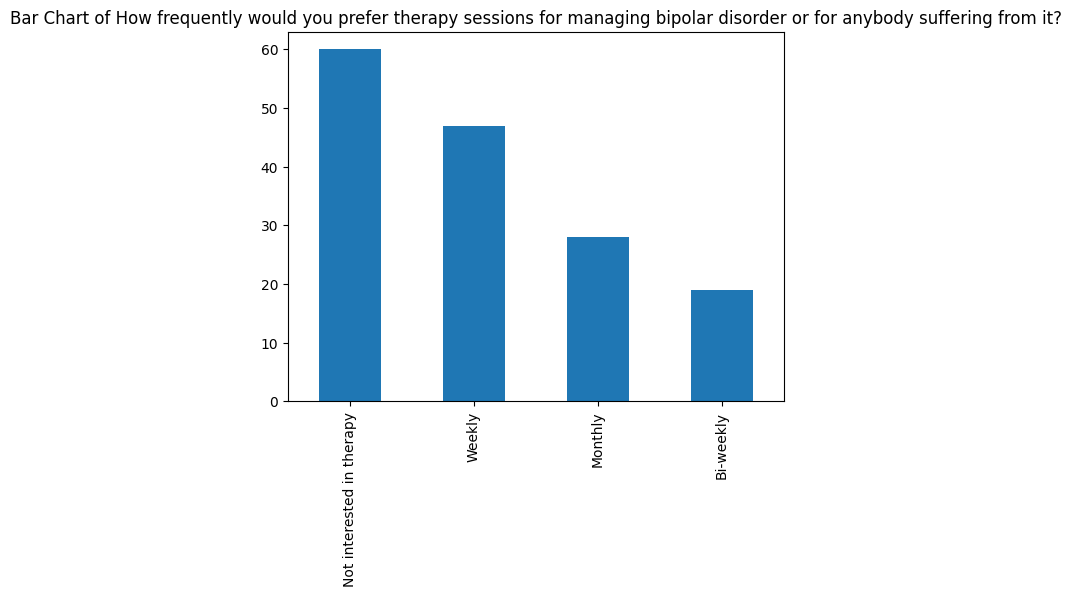

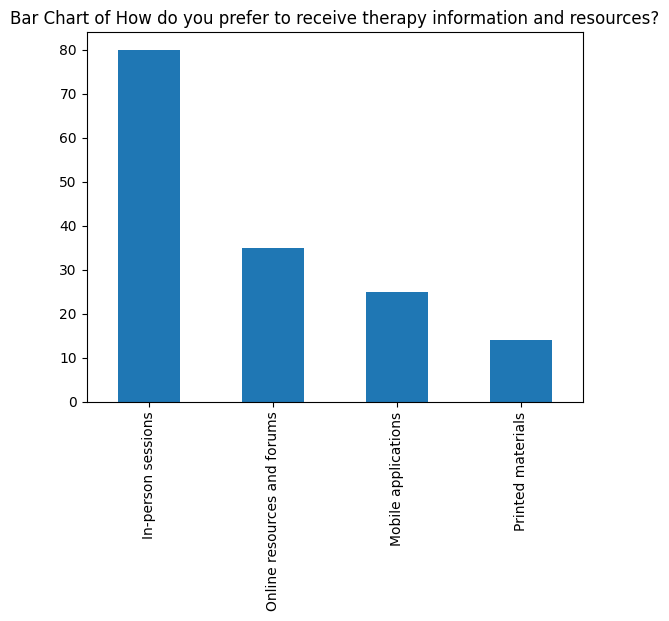

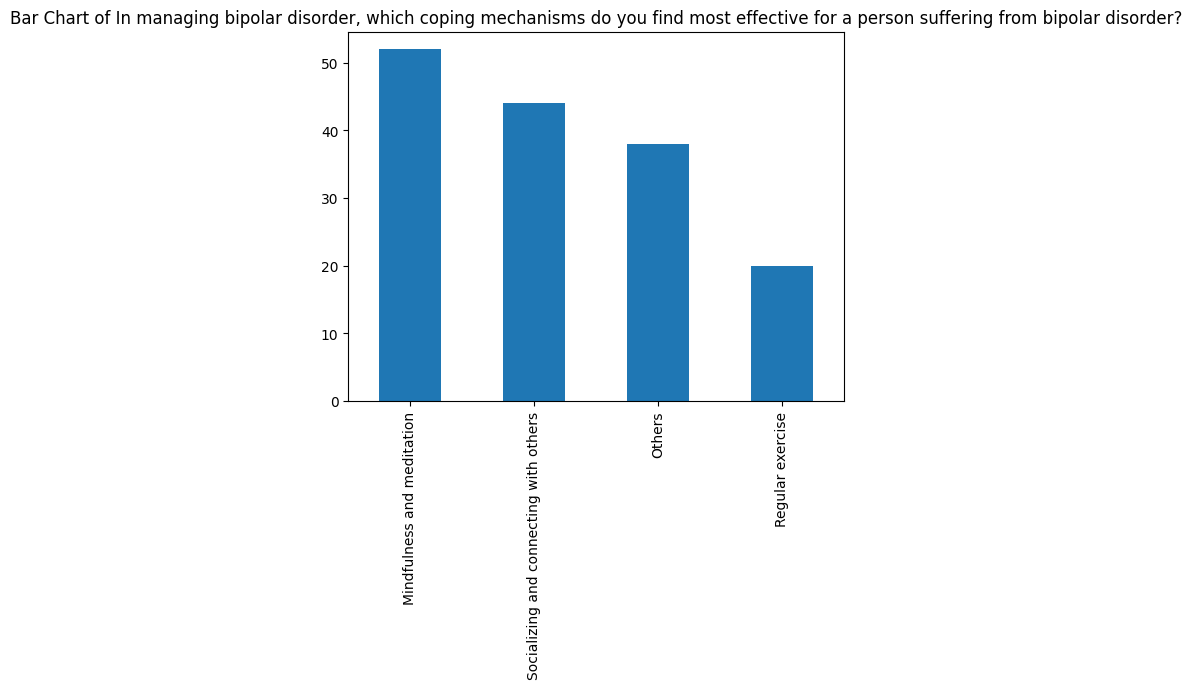

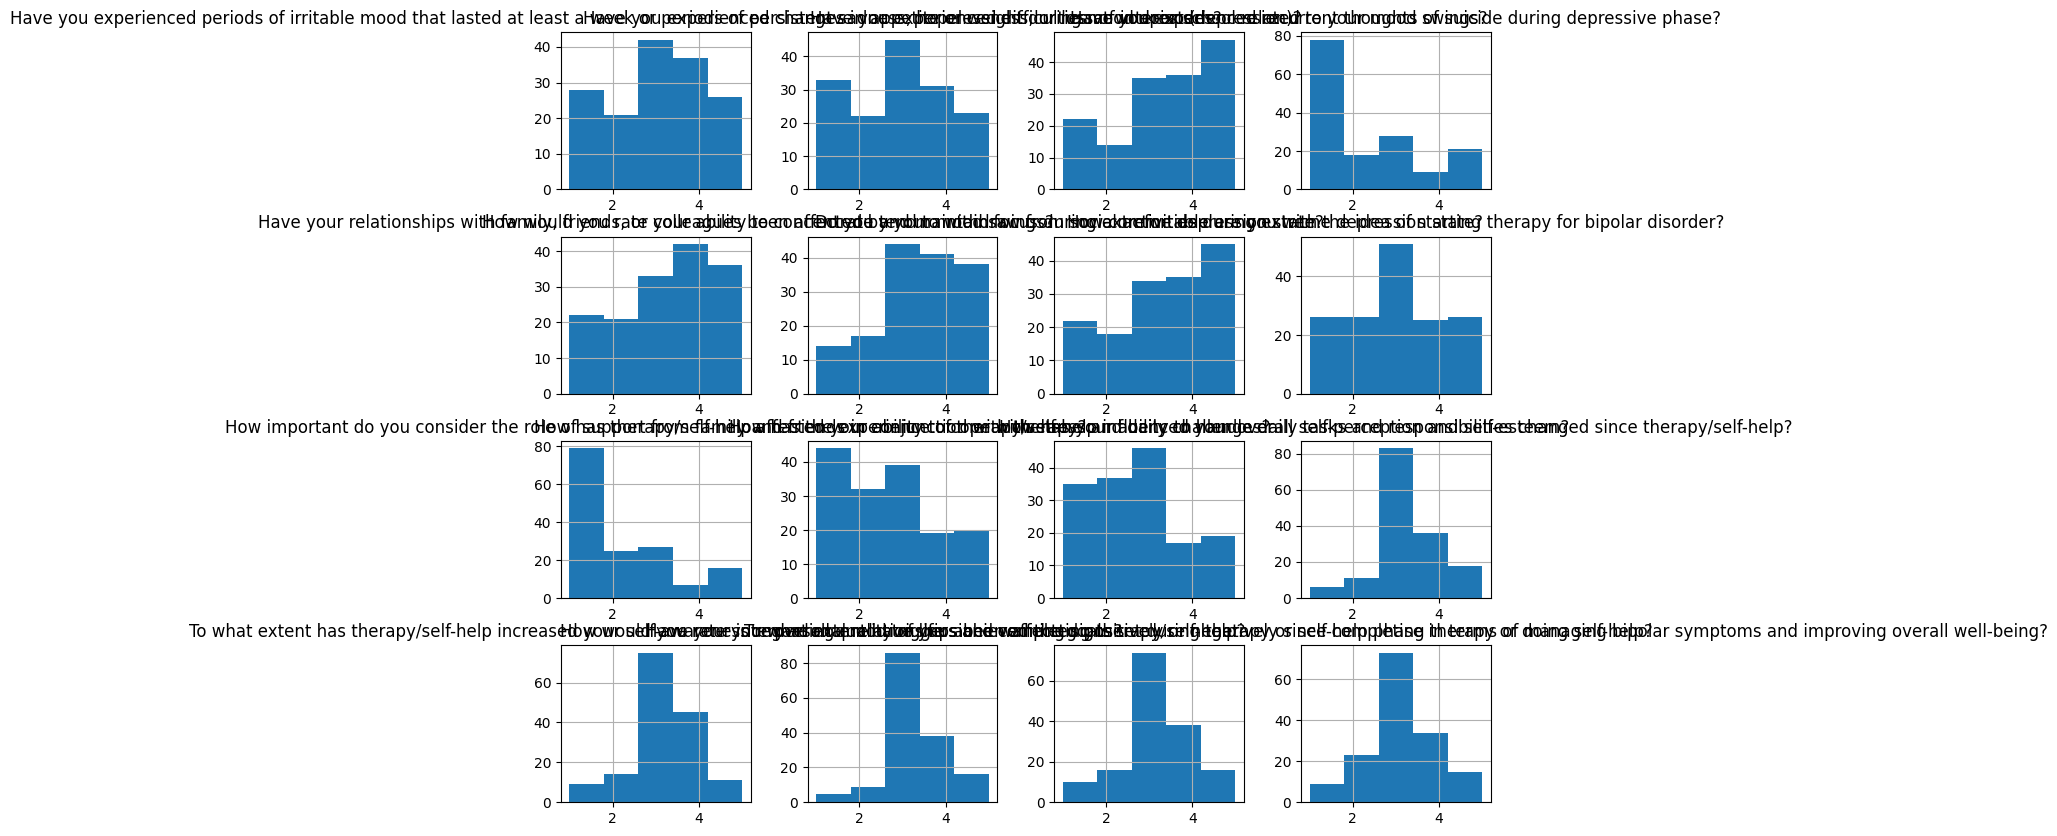

In [ ]:
# ------------------------------
# 2. Visualization
# ------------------------------

# Bar Charts for Categorical Data
for col in categorical_columns:
    data[col].value_counts().plot(kind='bar')
    plt.title(f"Bar Chart of {col}")
    plt.show()

# Histograms for Ordinal Data
data[ordinal_columns].hist(bins=5, figsize=(12, 10))
plt.show()

# Box Plots for Ordinal Data
data[ordinal_columns].plot(kind='box', figsize=(300,100 ))
plt.show()

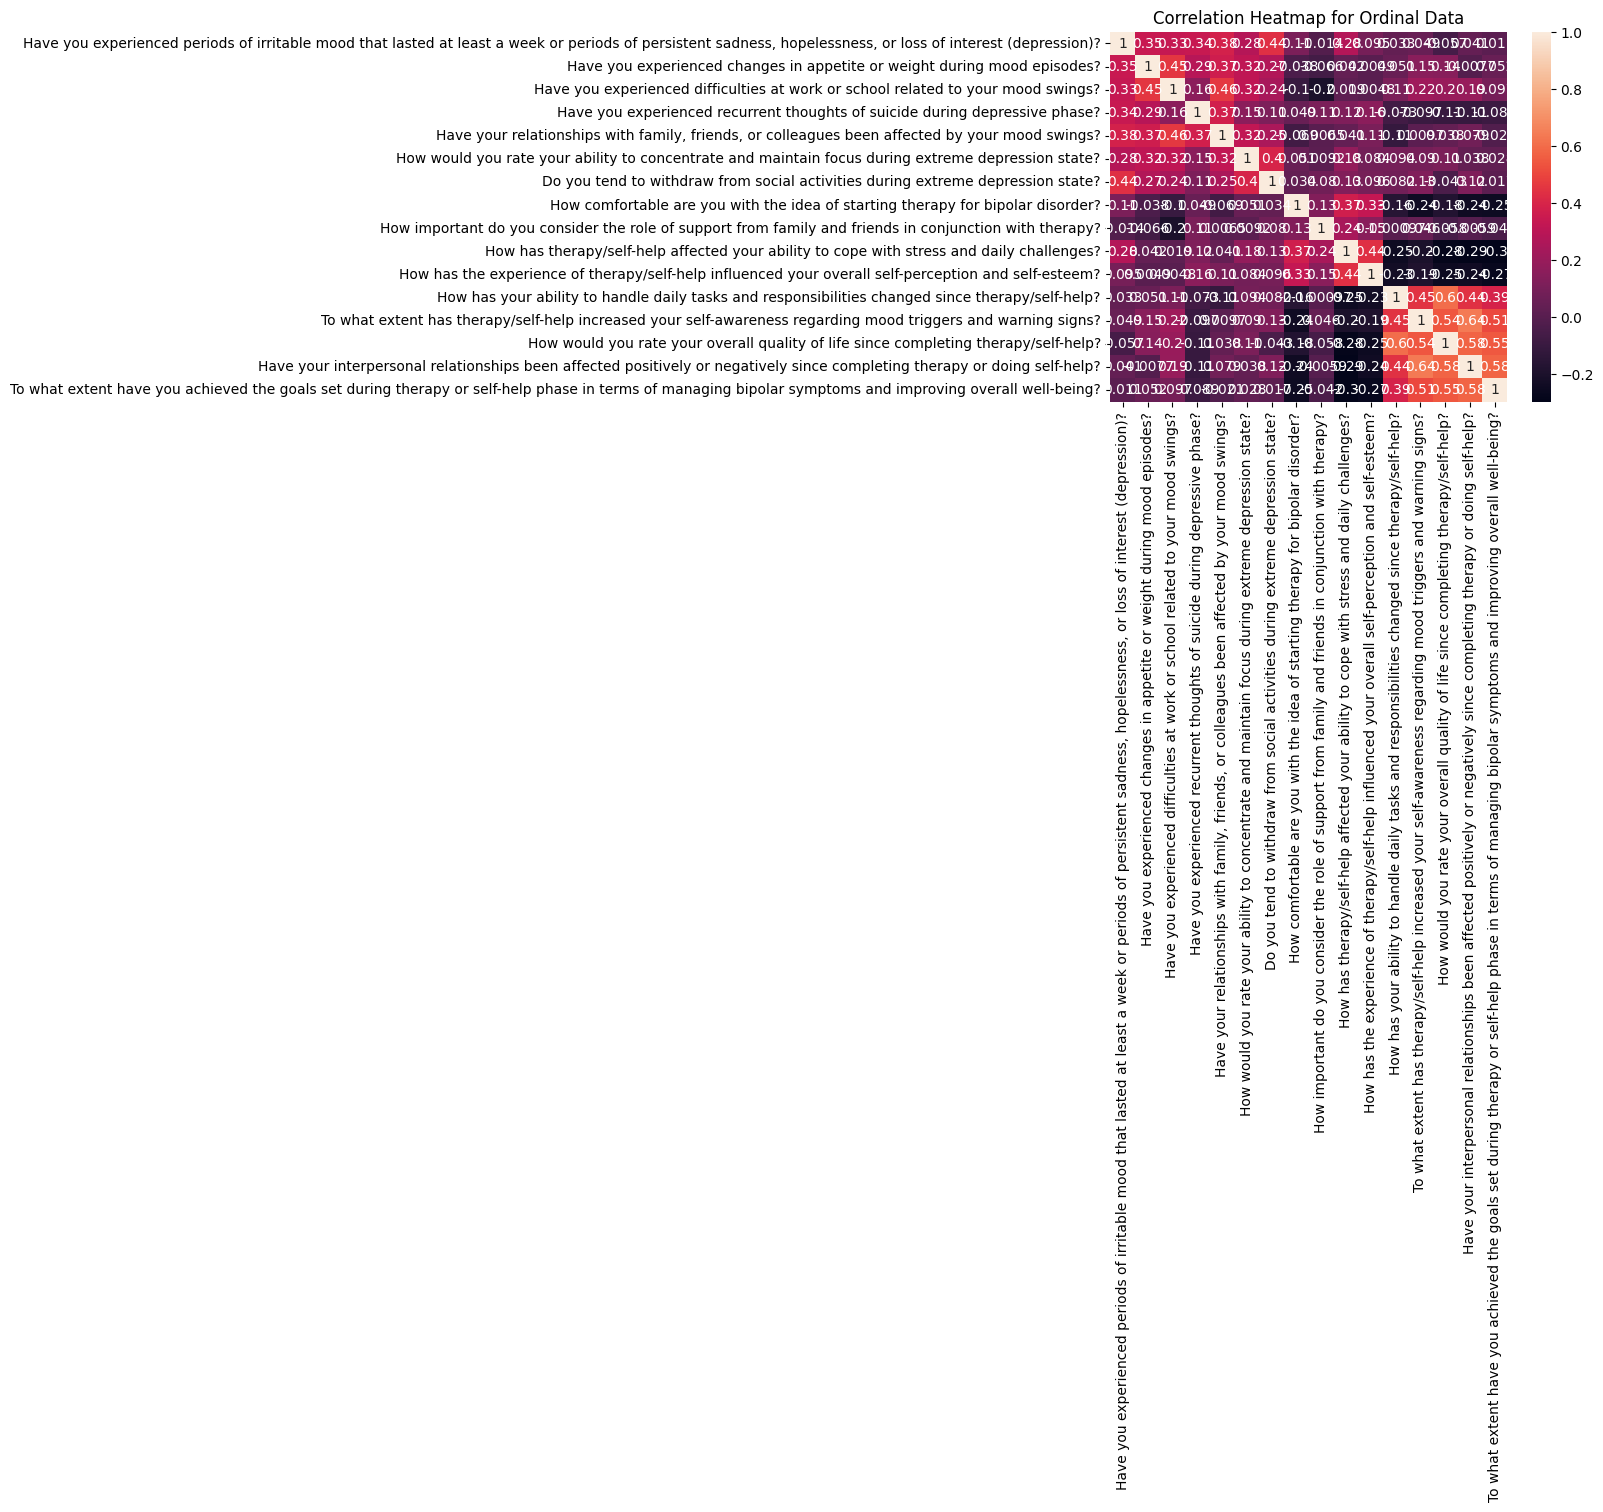

<Figure size 5000x5000 with 0 Axes>

In [ ]:
# ------------------------------
# 3. Correlation Analysis
# ------------------------------

# Heatmap for Ordinal Data Correlation
correlation_matrix = data[ordinal_columns].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap for Ordinal Data")
plt.figure(figsize=(50,50))
plt.show()

In [ ]:
# ------------------------------
# 4. Group Comparisons
# ------------------------------

# Example: Comparing Means or Medians
# Replace 'Gender' and 'OrdinalColumn1' with actual column names
print("\nGroup Comparison - Means:")
print("------------------------------------------")
print(ordinal_columns)
print(data.groupby('Gender')['Have you experienced periods of irritable mood that lasted at least a week or periods of persistent sadness, hopelessness, or loss of interest (depression)?'].mean())

# Cross-tabulations
# Replace 'Age' and 'Gender' with actual column names
print("\nCross-tabulation between Age and Gender:")
print(pd.crosstab(data['Age '], data['Gender']))



Group Comparison - Means:
------------------------------------------
['Have you experienced periods of irritable mood that lasted at least a week or periods of persistent sadness, hopelessness, or loss of interest (depression)?', 'Have you experienced changes in appetite or weight during mood episodes?', 'Have you experienced difficulties at work or school related to your mood swings?', 'Have you experienced recurrent thoughts of suicide during depressive phase?', 'Have your relationships with family, friends, or colleagues been affected by your mood swings?', 'How would you rate your ability to concentrate and maintain focus during extreme depression state?', 'Do you tend to withdraw from social activities during extreme depression state?', 'How comfortable are you with the idea of starting therapy for bipolar disorder?', 'How important do you consider the role of support from family and friends in conjunction with therapy?', 'How has therapy/self-help affected your ability to cope w

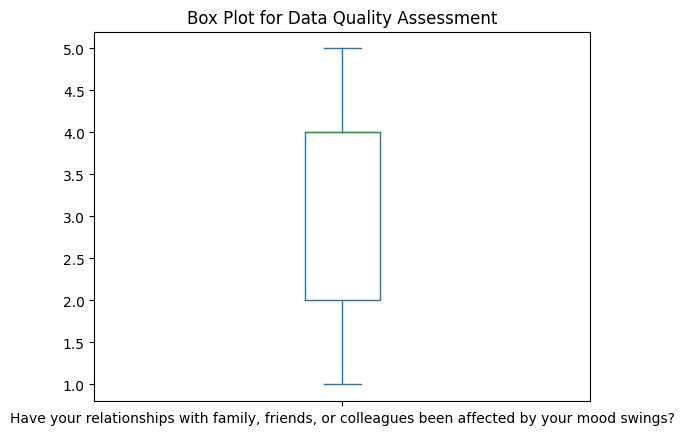

In [ ]:

# ------------------------------
# 8. Data Quality Assessment
# ------------------------------

# Example: Finding outliers for an ordinal column
data["Have your relationships with family, friends, or colleagues been affected by your mood swings?"].plot(kind='box')
plt.title("Box Plot for Data Quality Assessment")
plt.show()

Z-score: -4.710157024581823
P-value: 2.475260122771834e-06
Null hypothesis is rejected
The graphics are as follows:


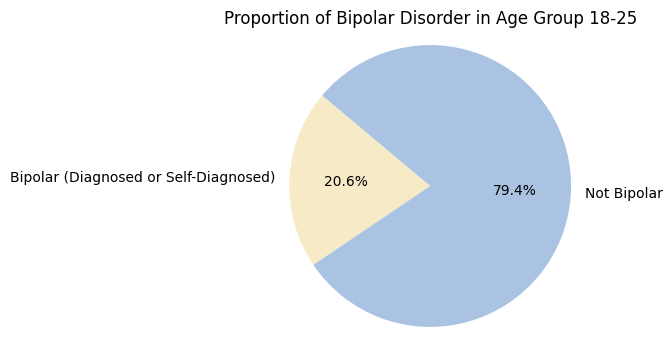

In [ ]:
import pandas as pd
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/bipolardisfinal.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Filtering data for the age group 18-25
data_18_25 = data[data['Age '] == '18-25']

# Assuming a column 'Diagnosis' indicates bipolar disorder (Yes/No)
# Replace 'Diagnosis' with the actual column name
diagnosis_column = 'Are you currently undergoing from diagnosis for bipolar disorder?'
bipolar_conditions = ['Yes', 'Self- Diagnosed']
bipolar_count = data_18_25[diagnosis_column].isin(bipolar_conditions).sum()
total_count_18_25 = len(data_18_25)

# Hypothesis testing using Z-test
# Null hypothesis: p = 0.4 (40% of people in the age group of 18-25 are bipolar)
p_null = 0.4
p_sample = bipolar_count / total_count_18_25

# Standard error
std_error = np.sqrt(p_null * (1 - p_null) / total_count_18_25)

# Z-score
z_score = (p_sample - p_null) / std_error

# P-value
p_value = 2 * norm.cdf(-np.abs(z_score))  # Two-tailed test
zalpha1 = -1.96
zalpha2 = 1.96

print(f'Z-score: {z_score}')
print(f'P-value: {p_value}')
if z_score> zalpha2 or z_score<zalpha1:
  print("Null hypothesis is rejected")
else:
  print("Null hypothesis is accpeted")
print("The graphics are as follows:")
# Creating a pie chart
labels = ['Bipolar (Diagnosed or Self-Diagnosed)', 'Not Bipolar']
sizes = [bipolar_count, total_count_18_25 - bipolar_count]
colors = ['#f7ebc7', '#aac3e3']

plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Bipolar Disorder in Age Group 18-25")
plt.axis('equal')
plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Identifying the columns that correspond to the descriptions
# Replace these with the actual column names from your dataset
col3 = 'How would you rate your overall quality of life since completing therapy/self-help?'
col5 = 'How has your ability to handle daily tasks and responsibilities changed since therapy/self-help?'
col2 = 'Have your interpersonal relationships been affected positively or negatively since completing therapy or doing self-help?'
col4 = 'To what extent has therapy/self-help increased your self-awareness regarding mood triggers and warning signs?'

# Preparing data for regression analysis
x1 = data[col3]
y1 = data[col5]
x3 = data[col2]
y3 = data[col4]


# Adding a constant to the model (for the intercept)
x1 = sm.add_constant(x1)
x3 = sm.add_constant(x3)


# Fitting the regression models
model1 = sm.OLS(y1, x1).fit()
model3 = sm.OLS(y3, x3).fit()


# Regression equations
regression_eq1 = f"y1 = {model1.params[0]:.4f} + {model1.params[1]:.4f} * x1"
regression_eq3 = f"y3 = {model3.params[0]:.4f} + {model3.params[1]:.4f} * x3"


print(regression_eq1)
print(regression_eq3)


y1 = 1.1938 + 0.6377 * x1
y3 = 1.3167 + 0.5932 * x3


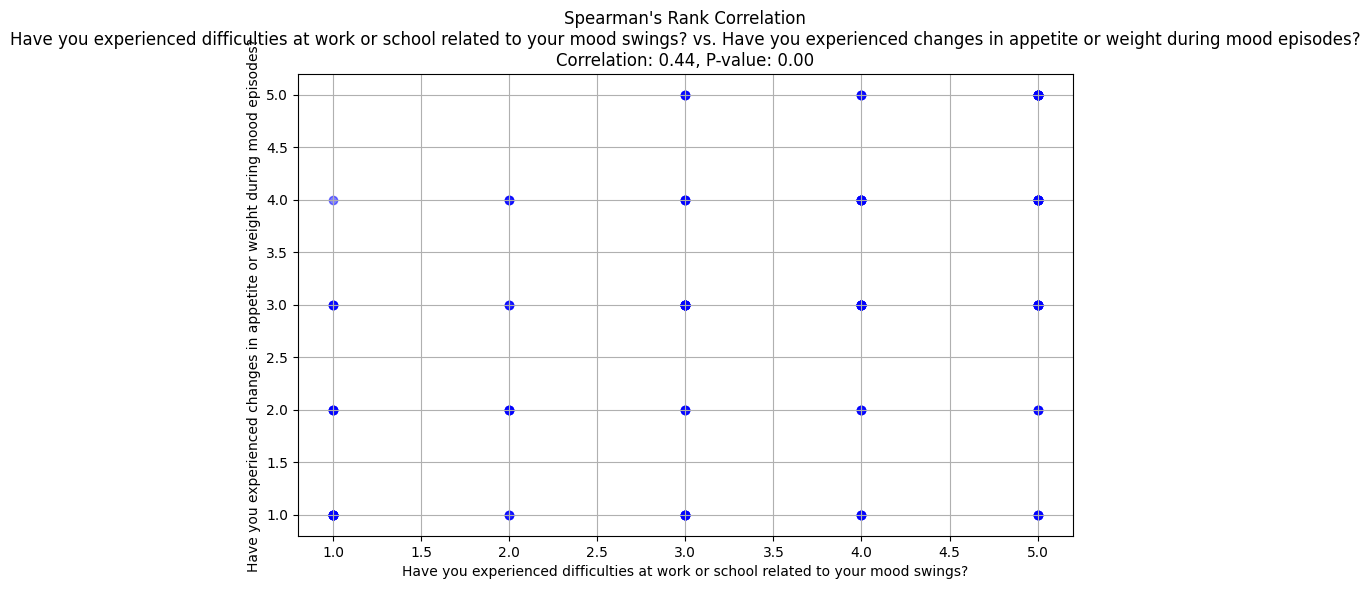

In [ ]:
from scipy.stats import spearmanr

# Example: Correlation between two ordinal variables
# Replace 'OrdinalColumn1' and 'OrdinalColumn2' with your actual column names
v1 = ordinal_columns[2]
v2 = ordinal_columns[1]
spearman_corr, spearman_p_value = spearmanr(data[v1], data[v2])
v1+' corr '+v2+":"+str(spearman_corr)+"with p value :"+str(spearman_p_value)

#=========================================================
# Visualizing the correlation
plt.figure(figsize=(10, 6))
plt.scatter(data[v1], data[v2], color='blue', alpha=0.5)
plt.title(f"Spearman's Rank Correlation\n{v1} vs. {v2}\nCorrelation: {spearman_corr:.2f}, P-value: {spearman_p_value:.2f}")
plt.xlabel(v1)
plt.ylabel(v2)
plt.grid(True)
plt.show()

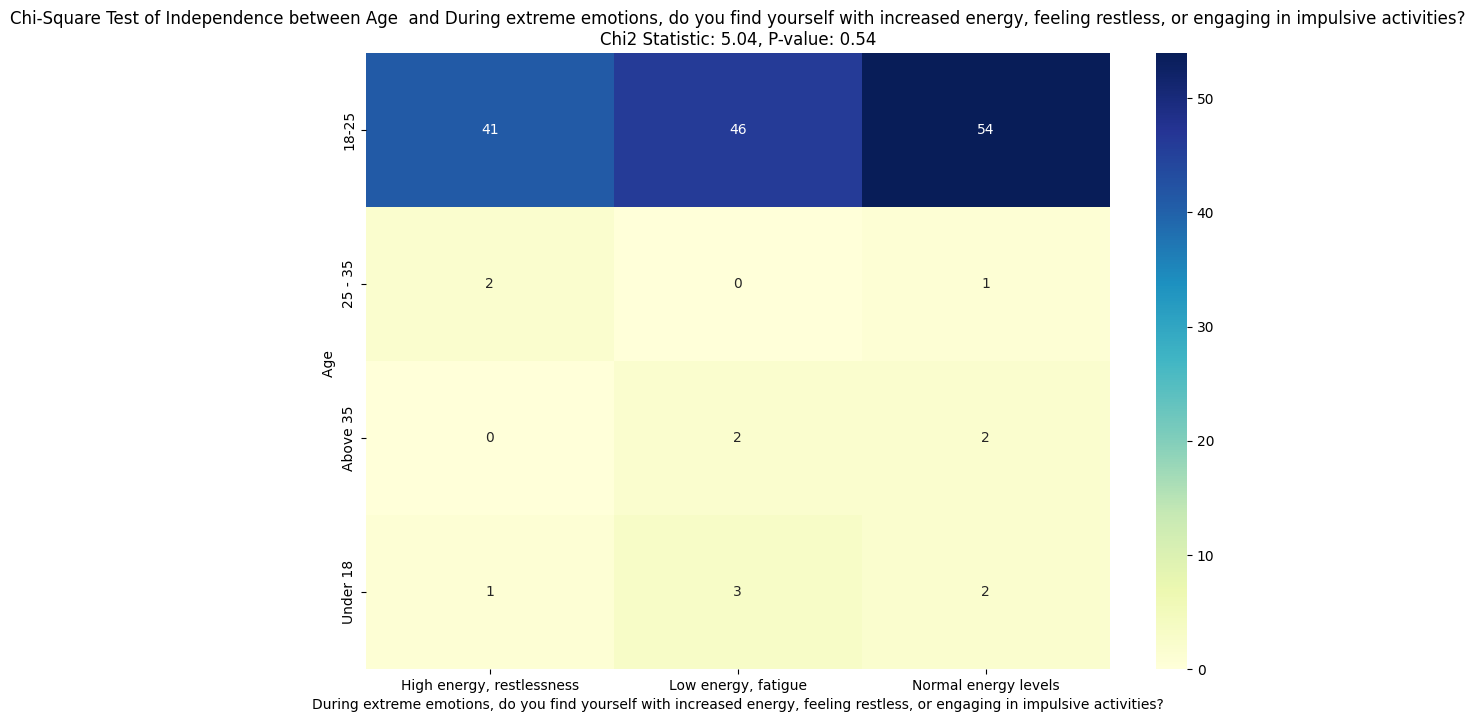

In [ ]:
from scipy.stats import chi2_contingency

# Example: Relationship between two categorical variables
# Replace 'CategoricalColumn1' and 'CategoricalColumn2' with your actual column names
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Printing the categorical columns
v1 = categorical_columns[0]
v2 = categorical_columns[3]
chi2_stat, chi2_p_value, dof, ex = chi2_contingency(pd.crosstab(data[v1], data[v2]))
chi2_stat, chi2_p_value, dof, ex
# Visualizing the contingency table with a heatmap
contingency_table = pd.crosstab(data[v1], data[v2])

plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title(f'Chi-Square Test of Independence between {v1} and {v2}\nChi2 Statistic: {chi2_stat:.2f}, P-value: {chi2_p_value:.2f}')
plt.xlabel(v2)
plt.ylabel(v1)
plt.show()

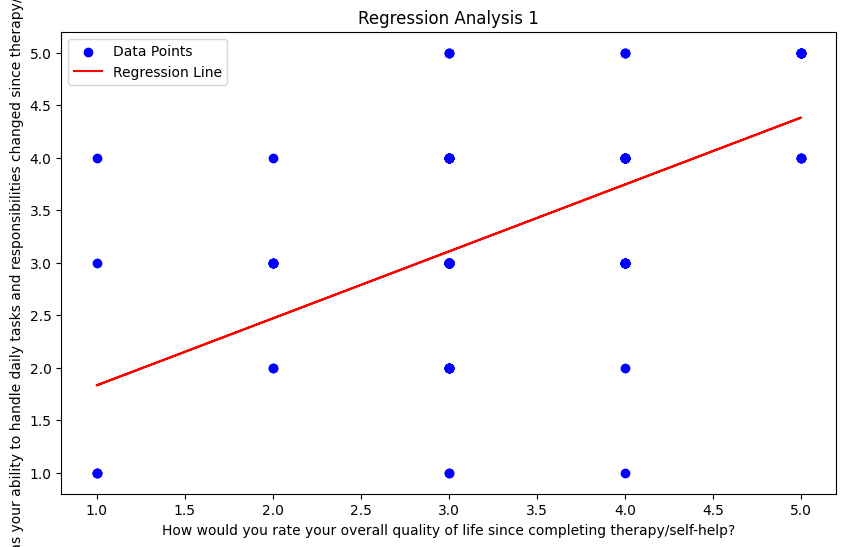

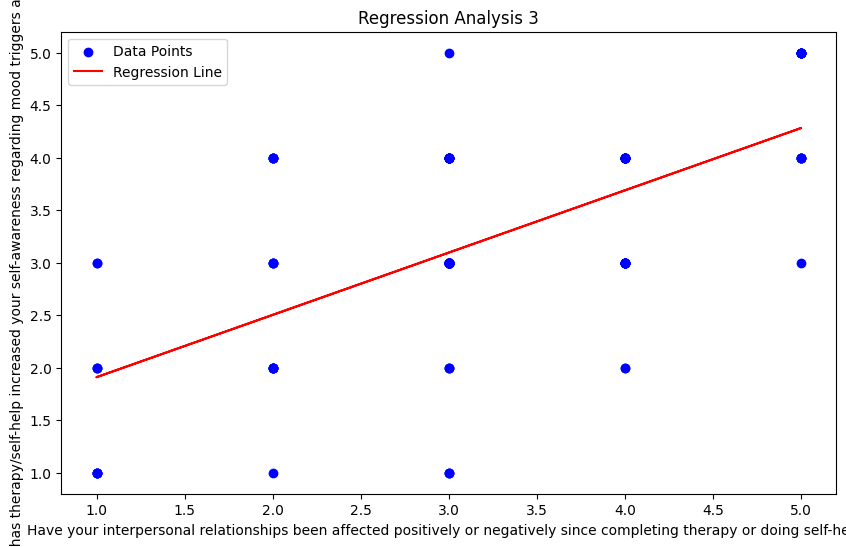

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt



# Identifying columns
col3 = 'How would you rate your overall quality of life since completing therapy/self-help?'
col5 = 'How has your ability to handle daily tasks and responsibilities changed since therapy/self-help?'
col2 = 'Have your interpersonal relationships been affected positively or negatively since completing therapy or doing self-help?'
col4 = 'To what extent has therapy/self-help increased your self-awareness regarding mood triggers and warning signs?'

# Preparing data for regression analysis
x1 = data[[col3]]  # Double square brackets ensure x1 is a DataFrame
y1 = data[col5]
x3 = data[[col2]]  # Double square brackets ensure x3 is a DataFrame
y3 = data[col4]

# Adding a constant to the model (for the intercept)
x1_const = sm.add_constant(x1)
x3_const = sm.add_constant(x3)

# Fitting the regression models
model1 = sm.OLS(y1, x1_const).fit()
model3 = sm.OLS(y3, x3_const).fit()

# Plotting Regression 1
plt.figure(figsize=(10, 6))
plt.scatter(x1, y1, color='blue', label='Data Points')
plt.plot(x1, model1.params[0] + model1.params[1] * x1, color='red', label='Regression Line')
plt.xlabel(col3)
plt.ylabel(col5)
plt.title('Regression Analysis 1')
plt.legend()
plt.show()

# Plotting Regression 3
plt.figure(figsize=(10, 6))
plt.scatter(x3, y3, color='blue', label='Data Points')
plt.plot(x3, model3.params[0] + model3.params[1] * x3, color='red', label='Regression Line')
plt.xlabel(col2)
plt.ylabel(col4)
plt.title('Regression Analysis 3')
plt.legend()
plt.show()